In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, TensorDataset


In [4]:
trainData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
testData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")

In [11]:
train_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
test_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")



X_train = train_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_train = train_data['Genre']
X_test = test_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_test = test_data['Genre']




label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)




y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy on test set: 0.4963

Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.61      0.70      0.65        40
         AMBIENT       0.69      0.93      0.79        40
       BASSHOUSE       0.37      0.38      0.37        40
         BIGROOM       0.51      0.62      0.56        40
       BREAKBEAT       0.81      0.95      0.87        40
     DRUMANDBASS       0.42      0.20      0.27        40
         DUBSTEP       0.76      0.80      0.78        40
      ELECTROPOP       0.33      0.25      0.29        40
      FUTUREBASS       0.28      0.35      0.31        40
     FUTUREHOUSE       0.37      0.17      0.24        40
       HARDSTYLE       0.58      0.35      0.44        40
     JACKINHOUSE       0.54      0.53      0.53        40
  MELODICDUBSTEP       0.13      0.15      0.14        40
           PHONK       0.48      0.35      0.41        40
PROGRESSIVEHOUSE       0.65      0.80      0.72        40
      PSY-TRANCE  

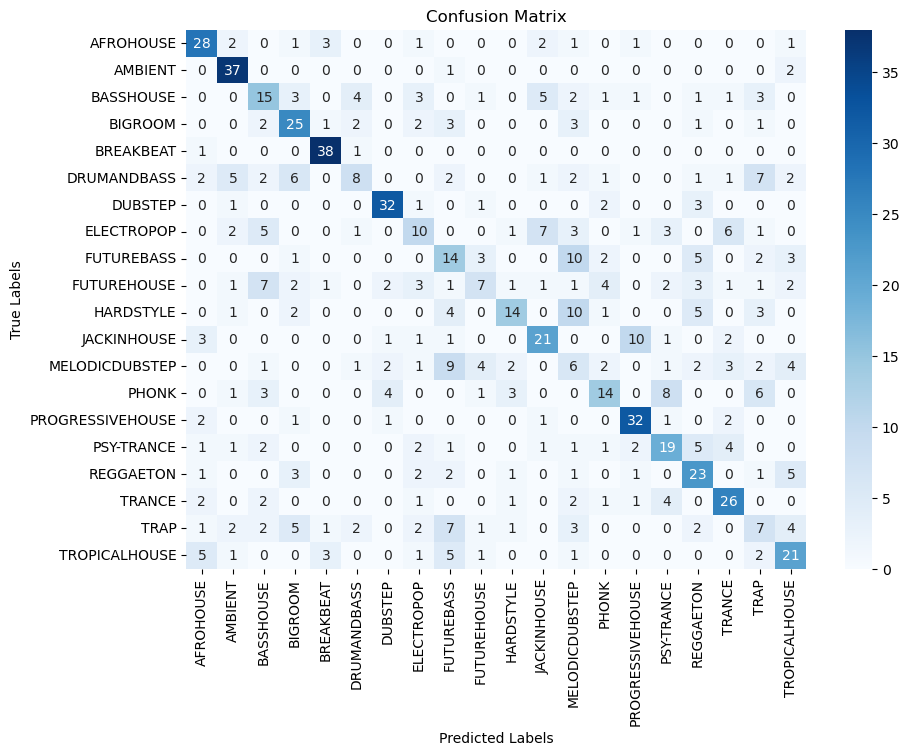

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()